In [216]:
import numpy as np

# parse as CSV
# 
data =  np.genfromtxt("measurements/2024-04-30/malte-5.csv", delimiter=",", skip_header=12, names=[
  "PacketCounter","SampleTimeFine","Quat_W","Quat_X","Quat_Y","Quat_Z","FreeAcc_X","FreeAcc_Y","FreeAcc_Z"
], dtype=(int, int, float, float, float, float , float, float, float ))
# normalize sample time fine

data["SampleTimeFine"] -= data["SampleTimeFine"][0]
# X=17178410. x=7915785.2 35368972.
# data = data[data["SampleTimeFine"] > 18316261]
# # 103630640.8 121547587.
# data = data[data["SampleTimeFine"] < 46820050]

# normalize again
data["SampleTimeFine"] -= data["SampleTimeFine"][0]



In [217]:
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
plt.ion()

In [218]:
%matplotlib widget

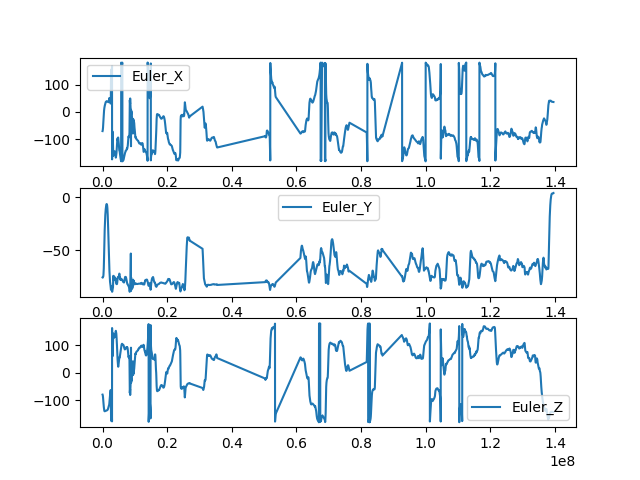

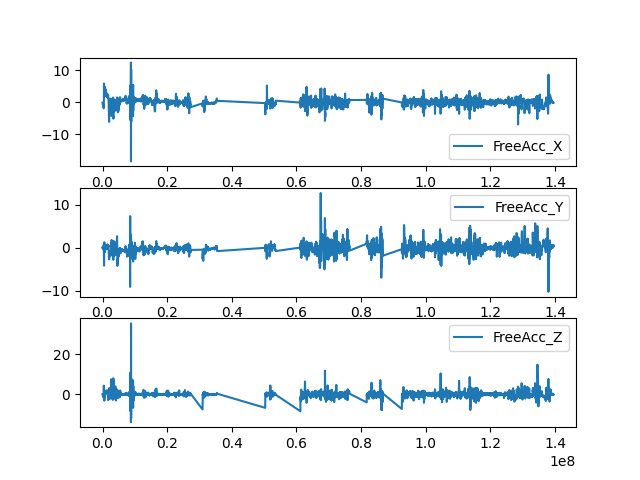

In [219]:

# plot free acc x,y,z above each other, in different plots above each other
plt.figure()
plt.subplot(3,1,1)
plt.plot(data["SampleTimeFine"], data["FreeAcc_X"])
plt.legend(["FreeAcc_X"])
plt.subplot(3,1,2)
plt.plot(data["SampleTimeFine"], data["FreeAcc_Y"])
plt.legend(["FreeAcc_Y"])
plt.subplot(3,1,3)
plt.plot(data["SampleTimeFine"], data["FreeAcc_Z"])
plt.legend(["FreeAcc_Z"])

# plot rotation quaternion as euler angles

# convert quaternion to euler angles

eulers = R.from_quat(np.vstack([data["Quat_X"], data["Quat_Y"], data["Quat_Z"], data["Quat_W"]]).T).as_euler("xyz", degrees=True)

plt.figure()
plt.subplot(3,1,1)
plt.plot(data["SampleTimeFine"], eulers[:,0])
plt.legend(["Euler_X"])
plt.subplot(3,1,2)
plt.plot(data["SampleTimeFine"], eulers[:,1])
plt.legend(["Euler_Y"])
plt.subplot(3,1,3)
plt.plot(data["SampleTimeFine"], eulers[:,2])
plt.legend(["Euler_Z"])


plt.show()


